In [76]:
import random
import time
import numpy as np
import pandas as pd
import matplotlib
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import loguniform
from sklearn_evaluation.plot import grid_search
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from PIL import Image as im
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import TruncatedSVD
from warnings import filterwarnings
from matplotlib import pyplot as plt

In [77]:
df = pd.read_csv("./utility/data/letter-recognition.data")
df

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [78]:
df.columns

Index(['T', '2', '8', '3', '5', '1', '8.1', '13', '0', '6', '6.1', '10', '8.2',
       '0.1', '8.3', '0.2', '8.4'],
      dtype='object')

In [79]:
df['T'].unique()

array(['I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F',
       'C', 'T', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

### Extracting Pair1 data

In [80]:
pair1_data = df[(df['T'] == 'H') | (df['T'] == 'K')]
pair1_data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
20,H,4,5,5,4,4,7,7,6,6,7,6,8,3,8,3,8
27,H,6,9,8,7,6,8,6,6,7,7,7,9,6,8,4,8
63,H,3,3,4,1,2,8,7,5,6,7,6,8,5,8,3,7
65,H,3,5,5,4,3,7,8,3,6,10,6,8,3,8,3,8
68,H,8,12,8,6,4,9,8,4,5,8,4,5,6,9,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19920,K,7,14,8,8,5,9,6,3,5,11,3,7,5,7,4,8
19930,K,3,1,5,3,3,6,7,4,8,7,6,11,3,8,5,9
19936,H,3,8,5,6,4,8,8,7,7,7,5,7,3,8,3,7
19956,H,5,7,8,5,5,9,7,3,6,10,4,7,5,8,4,9


### Extracting Pair2 data

In [81]:
pair2_data = df[(df['T'] == 'M') | (df['T'] == 'Y')]
pair2_data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
8,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
12,M,6,9,8,6,9,7,8,6,5,7,5,8,8,9,8,6
25,M,7,11,11,8,9,3,8,4,5,10,11,10,10,9,5,7
33,M,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
49,Y,7,11,9,8,8,9,5,6,4,7,8,8,3,9,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19939,Y,6,9,5,5,2,5,9,3,3,10,9,5,3,10,3,4
19948,M,5,8,7,6,7,8,6,6,5,7,7,10,11,6,2,9
19978,M,6,9,10,7,12,7,5,3,2,7,5,8,15,7,4,6
19981,Y,3,9,5,6,3,7,9,1,6,6,11,8,2,11,2,7


### Extracting Pair3 data

In [82]:
pair3_data = df[(df['T'] == 'I') | (df['T'] == 'Z')]
pair3_data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
109,I,2,9,3,7,2,8,7,0,7,13,6,9,0,8,1,8
112,I,3,9,4,7,3,7,7,0,7,13,6,8,0,8,1,8
118,Z,3,7,5,5,3,7,8,2,9,11,7,7,1,8,6,7
138,I,2,6,2,4,1,9,5,0,6,13,5,9,0,8,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19831,I,2,5,0,7,0,7,7,4,4,7,6,8,0,8,0,8
19883,Z,5,10,6,8,3,7,7,4,15,9,6,8,0,8,8,8
19894,I,1,5,1,4,1,8,7,1,7,7,6,7,0,8,3,7
19898,Z,2,5,3,4,2,7,7,5,9,6,6,8,1,8,7,8


### Seperate the data into X and y

In [83]:
X_pair1 = pair1_data.drop(columns = 'T')
y_pair1 = pair1_data['T']

In [84]:
X_pair2 = pair2_data.drop(columns = 'T')
y_pair2 = pair2_data['T']

In [85]:
X_pair3 = pair3_data.drop(columns = 'T')
y_pair3 = pair3_data['T']

### For each pair, set aside 10% of the relevant samples to use as a final validation set

In [86]:
X_pair1_train, X_pair1_test, y_pair1_train, y_pair1_test = train_test_split(X_pair1, y_pair1, test_size=0.1)

In [87]:
X_pair2_train, X_pair2_test, y_pair2_train, y_pair2_test = train_test_split(X_pair2, y_pair2, test_size=0.1)

In [88]:
X_pair3_train, X_pair3_test, y_pair3_train, y_pair3_test = train_test_split(X_pair3, y_pair3, test_size=0.1)

In [89]:
print("Pair 1 size" , X_pair1.shape)
print("Pair 2 size" , X_pair2.shape)
print("Pair 3 size" , X_pair3.shape)

Pair 1 size (1473, 16)
Pair 2 size (1578, 16)
Pair 3 size (1489, 16)


In [90]:
print("Pair 1 training size" , X_pair1_train.shape)
print("Pair 2 training size" , X_pair2_train.shape)
print("Pair 3 training size" , X_pair3_train.shape)

Pair 1 training size (1325, 16)
Pair 2 training size (1420, 16)
Pair 3 training size (1340, 16)


In [91]:
print("Pair 1 testing size" , X_pair1_test.shape)
print("Pair 2 testing size" , X_pair2_test.shape)
print("Pair 3 testing size" , X_pair3_test.shape)

Pair 1 testing size (148, 16)
Pair 2 testing size (158, 16)
Pair 3 testing size (149, 16)


### Graph Functions

In [92]:
# Method taken from https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
# Credit: sus_hml

def plot_search_results(grid):

    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical')
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1,linestyle='--', marker='o')
        ax[i].set_xlabel(p.upper())
    
    plt.show()

In [93]:
# Method taken from https://datascience.stackexchange.com/tags/naive-bayes-classifier/hot

def nb_plot(cvres):
    sm1 = cvres['mean_test_score']
    sm1 = np.array(sm1)
    _, ax = plt.subplots(1,1)

    plt.scatter(smoothingValues, sm1)

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel('Var Smoothing', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)
    ax.grid('on')

# Model Fitting

## K-Nearest Neighbors

In [94]:
from sklearn.neighbors import KNeighborsClassifier

hyperParameter = [1, 2, 3, 4, 5, 6, 7]
nNeighbors = [1, 3, 5, 7, 9]

tuneHyperParameter = dict(p = hyperParameter, n_neighbors = nNeighbors)

knnModel = KNeighborsClassifier()

pair1_knnModel = GridSearchCV(knnModel, tuneHyperParameter, cv=5)
pair2_knnModel = GridSearchCV(knnModel, tuneHyperParameter, cv=5)
pair3_knnModel = GridSearchCV(knnModel, tuneHyperParameter, cv=5)

pair1_knnModel_fit = pair1_knnModel.fit(X_pair1_train, y_pair1_train)

pair2_knnModel_fit = pair2_knnModel.fit(X_pair2_train, y_pair2_train)

pair3_knnModel_fit = pair3_knnModel.fit(X_pair3_train, y_pair3_train)


print("Result for pair 1: ", pair1_knnModel_fit.best_params_)
print("Best score for pair 1: ", pair1_knnModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 1: ", pair1_knnModel_fit.score(X_pair1_test, y_pair1_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print("Result for pair 2: ", pair2_knnModel_fit.best_params_)
print("Best score for pair 2: ", pair2_knnModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 2: ", pair2_knnModel_fit.score(X_pair2_test, y_pair2_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 3: ', pair3_knnModel_fit.best_params_)
print("Best score for pair 3: ", pair3_knnModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 3: ", pair3_knnModel_fit.score(X_pair3_test, y_pair3_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)

Result for pair 1:  {'n_neighbors': 5, 'p': 1}
Best score for pair 1:  0.9471698113207546
Score on testing data for pair 1:  0.9662162162162162
Total time is:  0.009973287582397461

Result for pair 2:  {'n_neighbors': 1, 'p': 1}
Best score for pair 2:  1.0
Score on testing data for pair 2:  1.0
Total time is:  0.011996984481811523

Result for pair 3:  {'n_neighbors': 1, 'p': 1}
Best score for pair 3:  0.9992537313432835
Score on testing data for pair 3:  1.0
Total time is:  0.009953975677490234


### Graphs of the cross validation results for KNN

### Pair 1 Graph for KNN

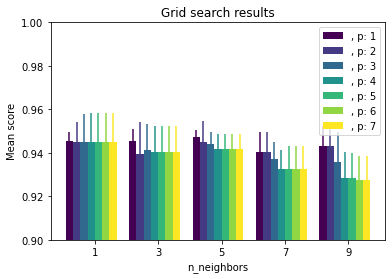

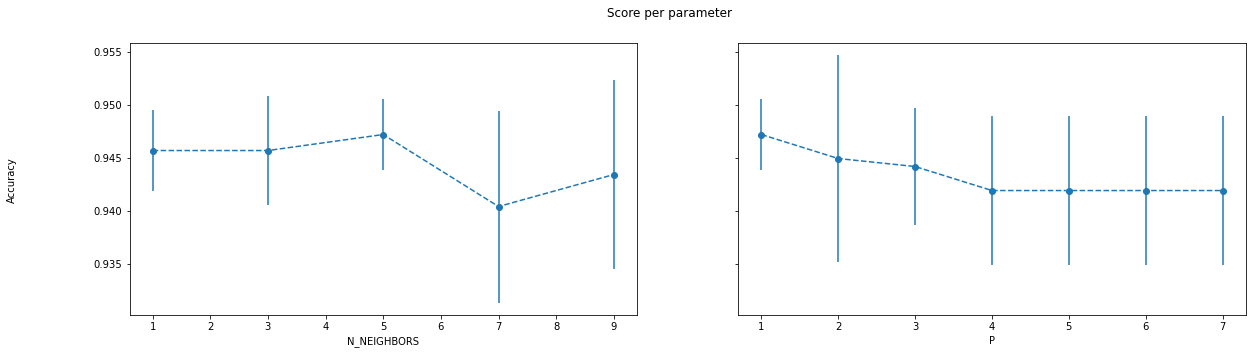

In [95]:
grid_search(pair1_knnModel_fit.cv_results_, change='n_neighbors', kind='bar')
plt.ylim((0.90, 1))
plt.show()

plot_search_results(pair1_knnModel_fit)

### Pair 2 Graph for KNN

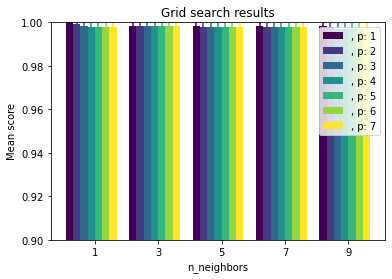

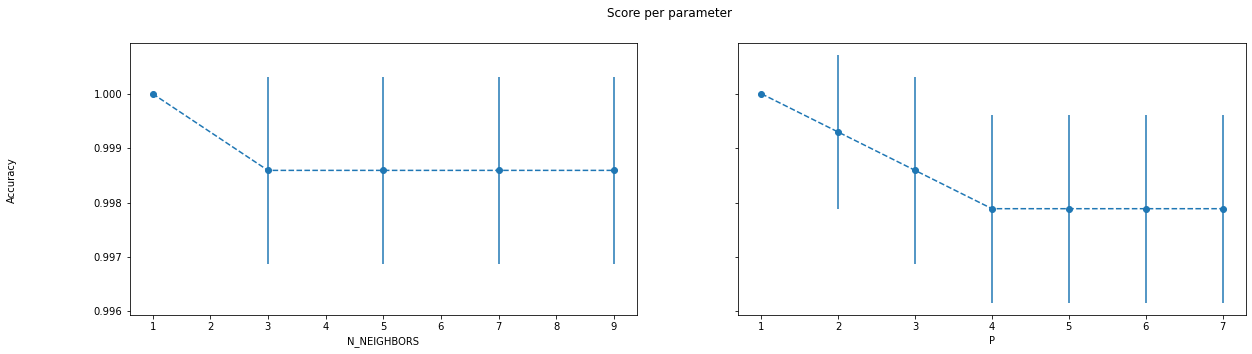

In [96]:
grid_search(pair2_knnModel_fit.cv_results_, change='n_neighbors', kind='bar')
plt.ylim((0.90, 1))
plt.show()

plot_search_results(pair2_knnModel_fit)

### Pair 3 Graph for KNN

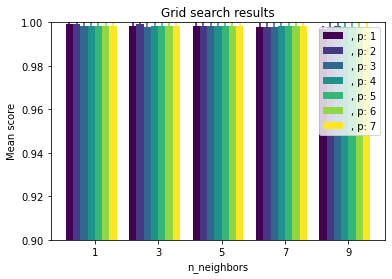

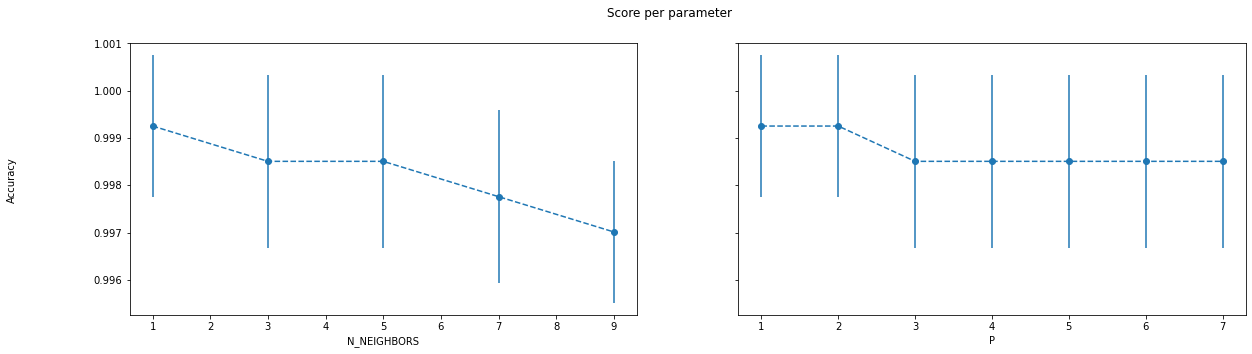

In [97]:
grid_search(pair3_knnModel_fit.cv_results_, change='n_neighbors', kind='bar')
plt.ylim((0.90, 1))
plt.show()

plot_search_results(pair3_knnModel_fit)

## Decision Tree

In [98]:
maxDepth = [2,4,6,8,10]
features = ['auto', 'sqrt', 'log2']

tuneHyperParameter = dict(max_depth=maxDepth, max_features=features)

dTreeModel = DecisionTreeClassifier()

pair1_dTreeModel = GridSearchCV(dTreeModel, tuneHyperParameter, cv=5)
pair2_dTreeModel = GridSearchCV(dTreeModel, tuneHyperParameter, cv=5)
pair3_dTreeModel = GridSearchCV(dTreeModel, tuneHyperParameter, cv=5)

pair1_dTreeModel_fit = pair1_dTreeModel.fit(X_pair1_train, y_pair1_train)

pair2_dTreeModel_fit = pair2_dTreeModel.fit(X_pair2_train, y_pair2_train)

pair3_dTreeModel_fit = pair3_dTreeModel.fit(X_pair3_train, y_pair3_train)

print("Result for pair 1: ", pair1_dTreeModel_fit.best_params_)
print("Score for pair 1: ", pair1_dTreeModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 1: ", pair1_dTreeModel_fit.score(X_pair1_test, y_pair1_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 2: ', pair2_dTreeModel_fit.best_params_)
print("Score for pair 2: ", pair2_dTreeModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 2: ", pair2_dTreeModel_fit.score(X_pair2_test, y_pair2_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 3: ', pair3_dTreeModel_fit.best_params_)
print("Score for pair 3: ", pair3_dTreeModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 3: ", pair3_dTreeModel_fit.score(X_pair3_test, y_pair3_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)

Result for pair 1:  {'max_depth': 10, 'max_features': 'log2'}
Score for pair 1:  0.929056603773585
Score on testing data for pair 1:  0.8918918918918919
Total time is:  0.006980180740356445

Result for pair 2:  {'max_depth': 10, 'max_features': 'sqrt'}
Score for pair 2:  0.9880281690140846
Score on testing data for pair 2:  0.9873417721518988
Total time is:  0.0029921531677246094

Result for pair 3:  {'max_depth': 10, 'max_features': 'log2'}
Score for pair 3:  0.9835820895522389
Score on testing data for pair 3:  0.959731543624161
Total time is:  0.0029921531677246094


### Graphs of the cross validation results for Decision Tree

### Pair 1 Graph for Decision Tree

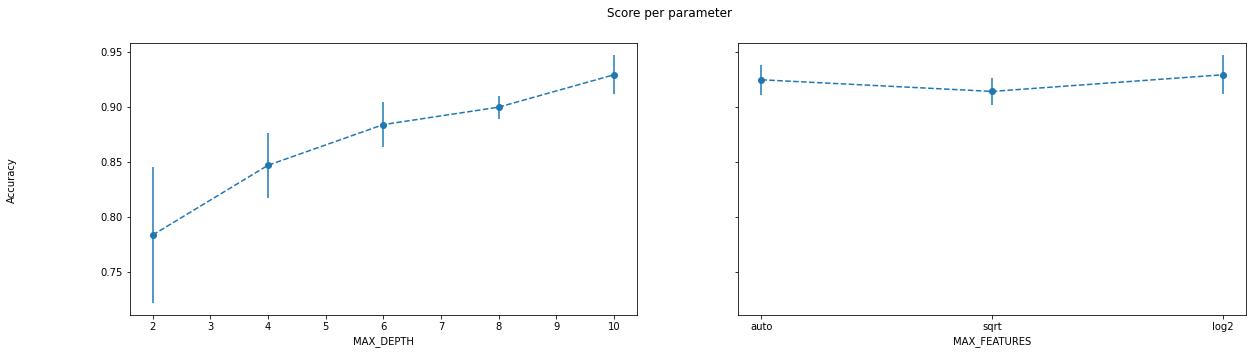

In [99]:
plot_search_results(pair1_dTreeModel_fit)

### Pair 2 Graph for Decision Tree

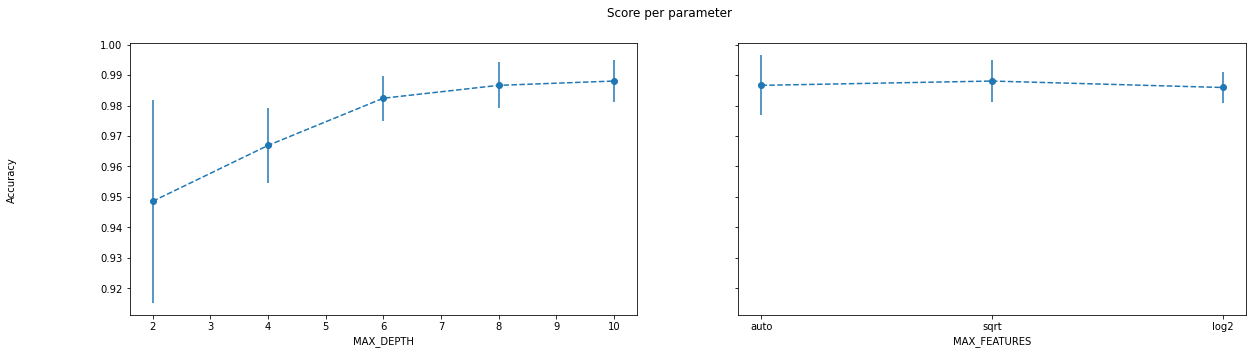

In [100]:
plot_search_results(pair2_dTreeModel_fit)

### Pair 3 Graph for Decision Tree

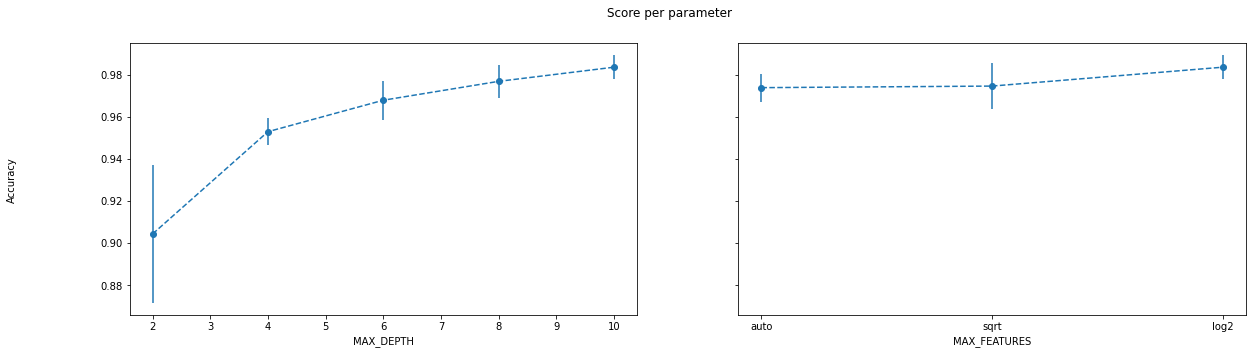

In [101]:
plot_search_results(pair3_dTreeModel_fit)

## Random Forest

In [102]:
estimators = [20,40,60,80,100]
maxDepth = [4,6,8,10,12]

tuneHyperParameter = dict(n_estimators=estimators,max_depth=maxDepth)

rForestModel = RandomForestClassifier()

pair1_rForestModel = GridSearchCV(rForestModel, tuneHyperParameter, cv=5)
pair2_rForestModel = GridSearchCV(rForestModel, tuneHyperParameter, cv=5)
pair3_rForestModel = GridSearchCV(rForestModel, tuneHyperParameter, cv=5)

pair1_rForestModel_fit = pair1_rForestModel.fit(X_pair1_train,y_pair1_train)

pair2_rForestModel_fit = pair2_rForestModel.fit(X_pair2_train,y_pair2_train)

pair3_rForestModel_fit = pair3_rForestModel.fit(X_pair3_train,y_pair3_train)

print('Result for pair 1: ', pair1_rForestModel_fit.best_params_)
print("Score for pair 1: ", pair1_rForestModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 1: ", pair1_rForestModel_fit.score(X_pair1_test, y_pair1_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 2: ', pair2_rForestModel_fit.best_params_)
print("Score for pair 2: ", pair2_rForestModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 2: ", pair2_rForestModel_fit.score(X_pair2_test, y_pair2_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 3: ', pair3_rForestModel_fit.best_params_)
print("Score for pair 3: ", pair3_rForestModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 3: ", pair3_rForestModel_fit.score(X_pair3_test, y_pair3_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)

Result for pair 1:  {'max_depth': 12, 'n_estimators': 60}
Score for pair 1:  0.9705660377358492
Score on testing data for pair 1:  0.972972972972973
Total time is:  0.010922431945800781

Result for pair 2:  {'max_depth': 10, 'n_estimators': 20}
Score for pair 2:  0.997887323943662
Score on testing data for pair 2:  0.9936708860759493
Total time is:  0.005984067916870117

Result for pair 3:  {'max_depth': 12, 'n_estimators': 60}
Score for pair 3:  0.9947761194029849
Score on testing data for pair 3:  0.9865771812080537
Total time is:  0.013964414596557617


### Graphs of the cross validation results for Random Forest

### Pair 1 Graph for Random Forest

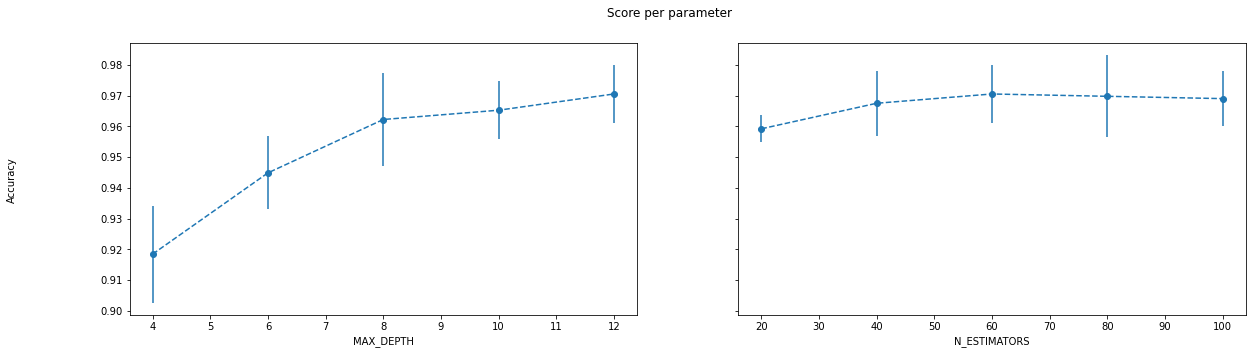

In [103]:
plot_search_results(pair1_rForestModel_fit)

### Pair 2 Graph for Random Forest

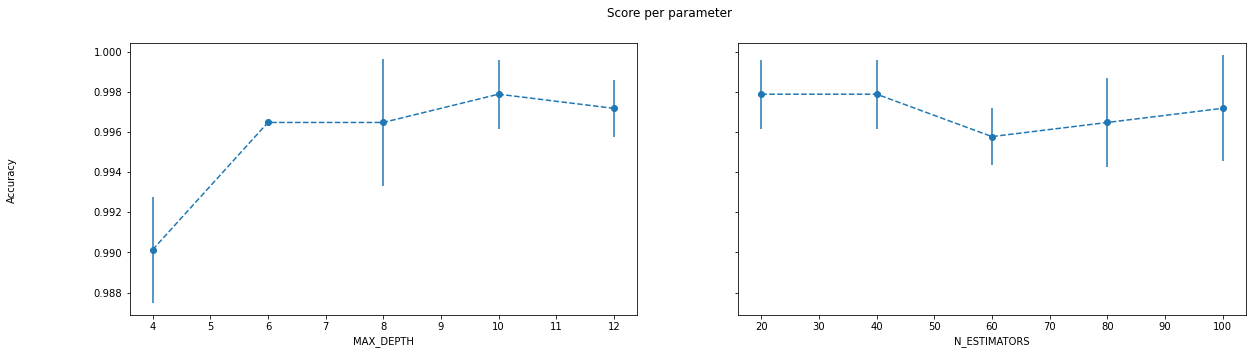

In [104]:
plot_search_results(pair2_rForestModel_fit)

### Pair 3 Graph for Random Forest

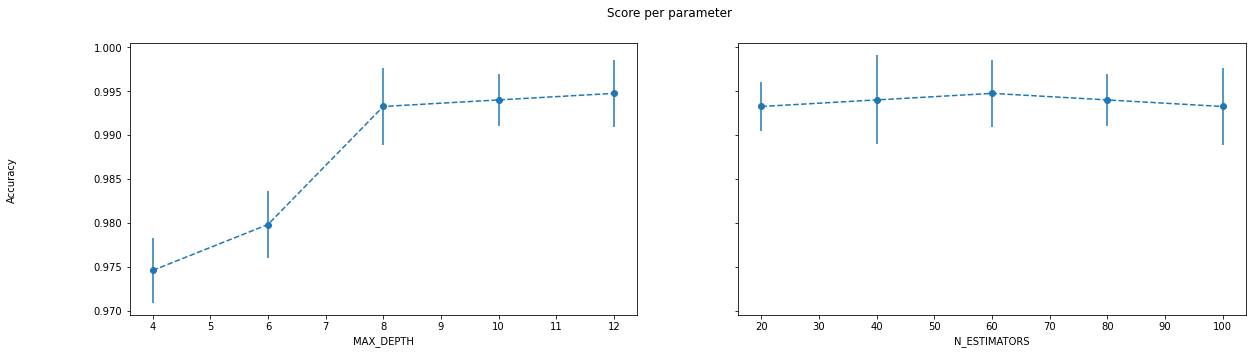

In [105]:
plot_search_results(pair3_rForestModel_fit)

## SVM

In [106]:
kernel = ['rbf']
cvalue = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

tuneHyperParameter = dict(kernel=kernel, C=cvalue, gamma=gamma)

svmModel = SVC()

pair1_svmModel = GridSearchCV(svmModel, tuneHyperParameter, cv=5)
pair2_svmModel = GridSearchCV(svmModel, tuneHyperParameter, cv=5)
pair3_svmModel = GridSearchCV(svmModel, tuneHyperParameter, cv=5)

pair1_svmModel_fit = pair1_svmModel.fit(X_pair1_train,y_pair1_train)

pair2_svmModel_fit = pair2_svmModel.fit(X_pair2_train,y_pair2_train)

pair3_svmModel_fit = pair3_svmModel.fit(X_pair3_train,y_pair3_train)

print('Result for pair 1:', pair1_svmModel_fit.best_params_)
print("Score for pair 1: ", pair1_svmModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 1: ", pair1_svmModel_fit.score(X_pair1_test, y_pair1_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 2:', pair2_svmModel_fit.best_params_)
print("Score for pair 2: ", pair2_svmModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 2: ", pair2_svmModel_fit.score(X_pair2_test, y_pair2_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 3:', pair3_svmModel_fit.best_params_)
print("Score for pair 3: ", pair3_svmModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 3: ", pair3_svmModel_fit.score(X_pair3_test, y_pair3_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)

Result for pair 1: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Score for pair 1:  0.9788679245283018
Score on testing data for pair 1:  0.9864864864864865
Total time is:  0.003960371017456055

Result for pair 2: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Score for pair 2:  1.0
Score on testing data for pair 2:  1.0
Total time is:  0.007013082504272461

Result for pair 3: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Score for pair 3:  0.9992537313432835
Score on testing data for pair 3:  1.0
Total time is:  0.004984855651855469


### Graphs of the cross validation results for SVM

### Pair 1 Graph for SVM

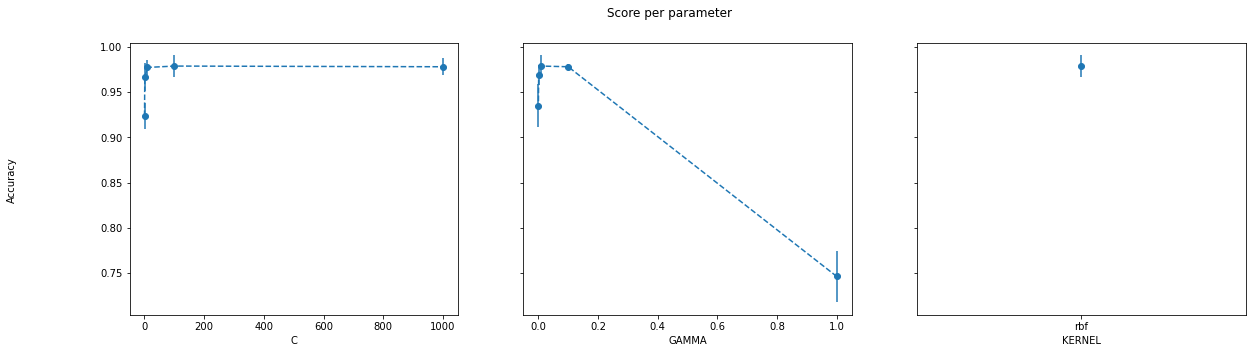

In [107]:
plot_search_results(pair1_svmModel_fit)

### Pair 2 Graph for SVM

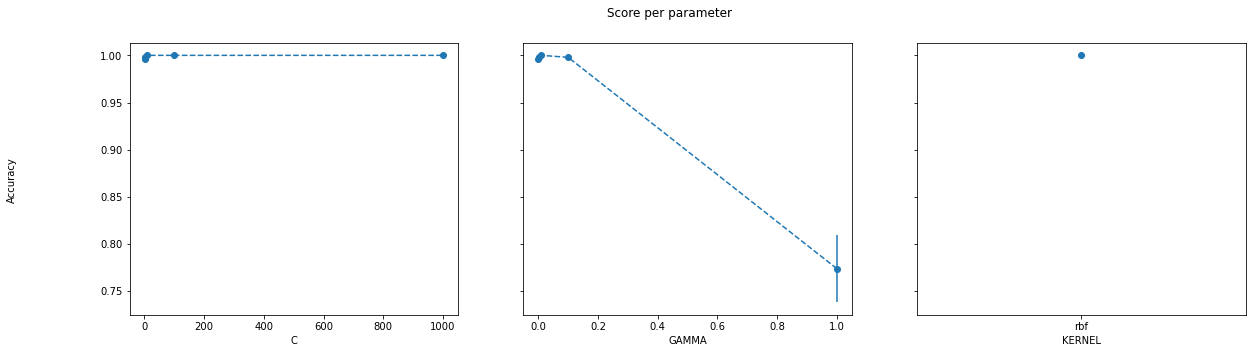

In [108]:
plot_search_results(pair2_svmModel_fit)

### Pair 3 Graph for SVM

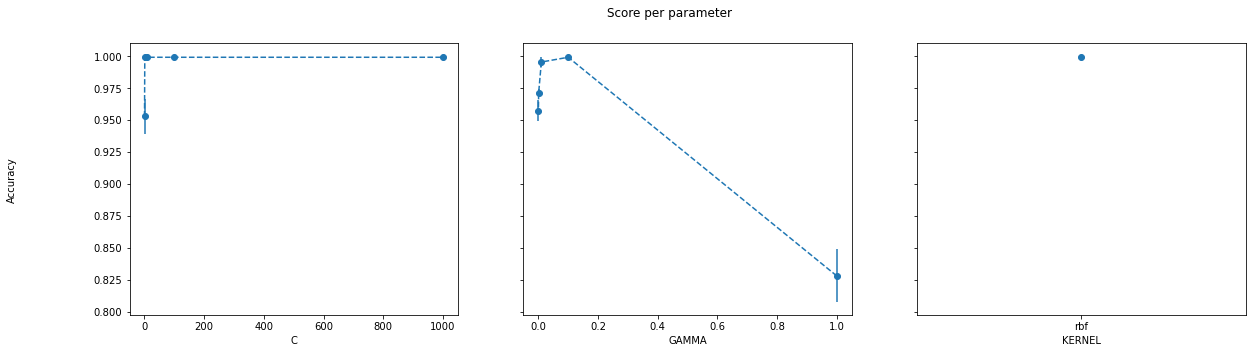

In [109]:
plot_search_results(pair3_svmModel_fit)

## Artifical Neural Network

In [110]:
activationFunction = ['identity', 'logistic', 'tanh', 'relu']
learningRates = [0.1, 0.01, 0.001, 0.002, 0.0001]

tuneHyperParameter = dict(activation = activationFunction, learning_rate_init = learningRates)

annModel = MLPClassifier()

pair1_annModel = GridSearchCV(annModel, tuneHyperParameter, cv=5)
pair2_annModel = GridSearchCV(annModel, tuneHyperParameter, cv=5)
pair3_annModel = GridSearchCV(annModel, tuneHyperParameter, cv=5)

pair1_annModel_fit = pair1_annModel.fit(X_pair1_train,y_pair1_train)

pair2_annModel_fit = pair2_annModel.fit(X_pair2_train,y_pair2_train)

pair3_annModel_fit = pair3_annModel.fit(X_pair3_train,y_pair3_train)

print('Result for pair 1:', pair1_annModel_fit.best_params_)
print("Score for pair 1: ", pair1_annModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 1: ", pair1_annModel.score(X_pair1_test, y_pair1_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 2:', pair2_annModel_fit.best_params_)
print("Score for pair 2: ", pair2_annModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 2: ", pair2_annModel.score(X_pair2_test, y_pair2_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 3:', pair3_annModel_fit.best_params_)
print("Score for pair 3: ", pair3_annModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 3: ", pair3_annModel.score(X_pair3_test, y_pair3_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)

Result for pair 1: {'activation': 'tanh', 'learning_rate_init': 0.002}
Score for pair 1:  0.9811320754716981
Score on testing data for pair 1:  0.972972972972973
Total time is:  0.003988742828369141

Result for pair 2: {'activation': 'tanh', 'learning_rate_init': 0.01}
Score for pair 2:  0.9985915492957746
Score on testing data for pair 2:  1.0
Total time is:  0.0034325122833251953

Result for pair 3: {'activation': 'tanh', 'learning_rate_init': 0.002}
Score for pair 3:  0.9955223880597014
Score on testing data for pair 3:  1.0
Total time is:  0.0040035247802734375


### Graphs of the cross validation results for ANN

### Pair 1 Graph for ANN

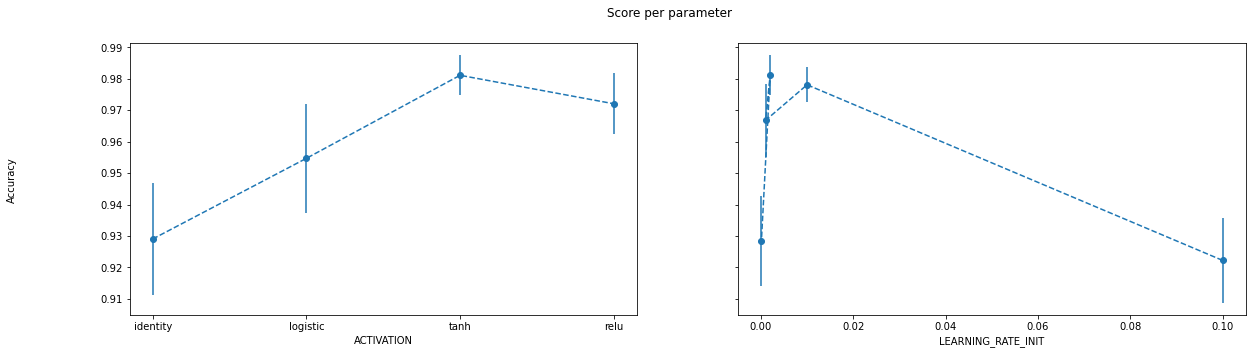

In [111]:
plot_search_results(pair1_annModel_fit)

### Pair 2 Graph for ANN

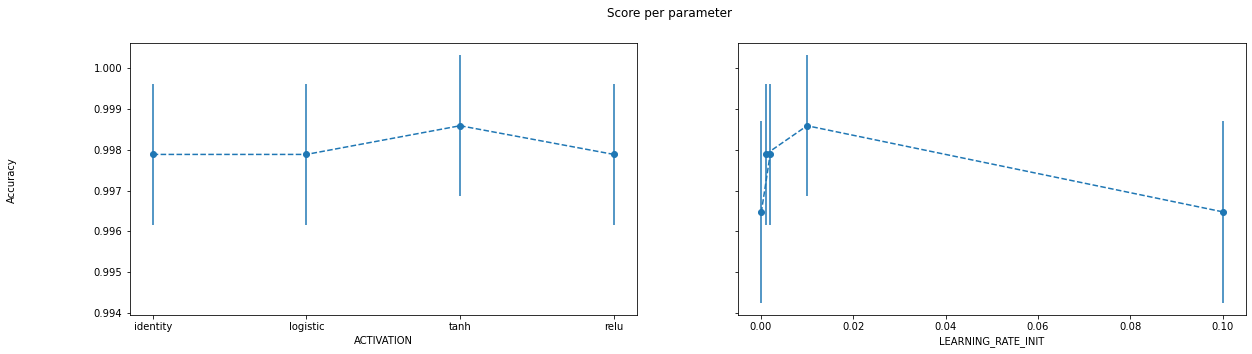

In [112]:
plot_search_results(pair2_annModel_fit)

### Pair 3 Graph for ANN

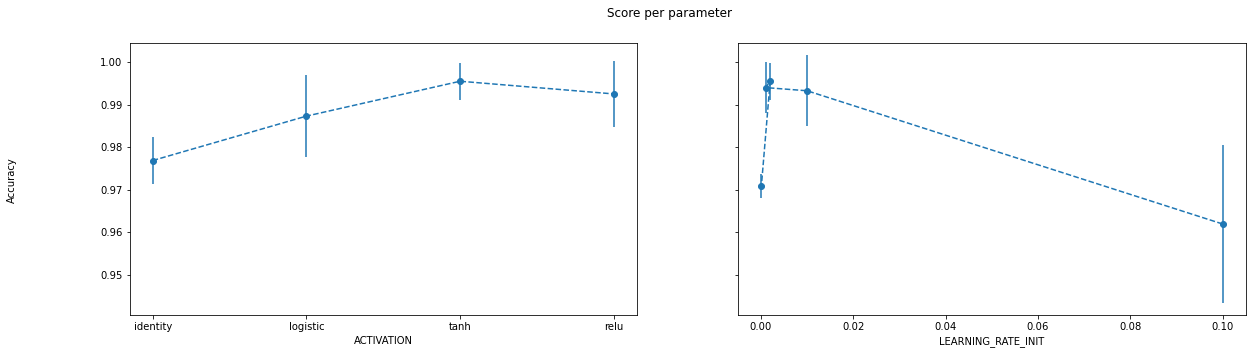

In [113]:
plot_search_results(pair3_annModel_fit)

## Naive Bayes

In [114]:
smoothingValues = np.logspace(0,-9, num=100)

tuneHyperParameter = dict(var_smoothing = smoothingValues)

nbModel = GaussianNB()

pair1_nbModel = GridSearchCV(nbModel, tuneHyperParameter, cv=5)
pair2_nbModel = GridSearchCV(nbModel, tuneHyperParameter, cv=5)
pair3_nbModel = GridSearchCV(nbModel, tuneHyperParameter, cv=5)

pair1_nbModel_fit = pair1_nbModel.fit(X_pair1_train,y_pair1_train)

pair2_nbModel_fit = pair2_nbModel.fit(X_pair2_train,y_pair2_train)

pair3_nbModel_fit = pair3_nbModel.fit(X_pair3_train,y_pair3_train)

print('Result for pair 1:', pair1_nbModel_fit.best_params_)
print("Score for pair 1: ", pair1_nbModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 1: ", pair1_nbModel_fit.score(X_pair1_test, y_pair1_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 2:', pair2_nbModel_fit.best_params_)
print("Score for pair 2: ", pair2_nbModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 2: ", pair2_nbModel_fit.score(X_pair2_test, y_pair2_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 3:', pair3_nbModel_fit.best_params_)
print("Score for pair 3: ", pair3_nbModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 3: ", pair3_nbModel_fit.score(X_pair3_test, y_pair3_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)

Result for pair 1: {'var_smoothing': 0.23101297000831597}
Score for pair 1:  0.8611320754716981
Score on testing data for pair 1:  0.831081081081081
Total time is:  0.0029604434967041016

Result for pair 2: {'var_smoothing': 0.03511191734215131}
Score for pair 2:  0.9711267605633802
Score on testing data for pair 2:  0.9556962025316456
Total time is:  0.006056070327758789

Result for pair 3: {'var_smoothing': 0.8111308307896871}
Score for pair 3:  0.8962686567164179
Score on testing data for pair 3:  0.8389261744966443
Total time is:  0.002004861831665039


### Graphs of the cross validation results for NB

### Pair 1 Graph for NB

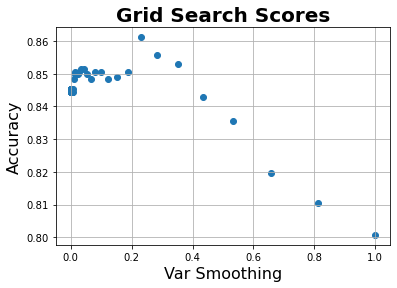

In [115]:
nb_plot(pair1_nbModel_fit.cv_results_)

### Pair 2 Graph for NB

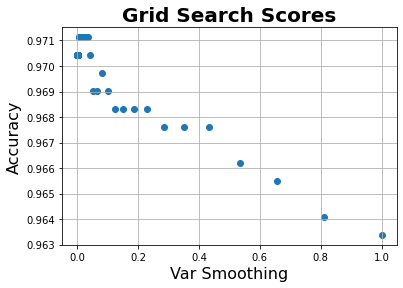

In [116]:
nb_plot(pair2_nbModel_fit.cv_results_)

### Pair 3 Graph for NB

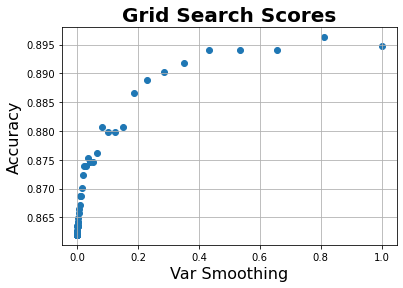

In [117]:
nb_plot(pair3_nbModel_fit.cv_results_)

## Logistic Regression

In [118]:
solver = ['newton-cg', 'lbfgs', 'liblinear']
cValues = [0.00001, 0.0001, 0.001, 0.01, 0.1]

tuneHyperParameter = dict(solver = solver, C = cValues)

lgrModel = LogisticRegression()

pair1_lgrModel = GridSearchCV(lgrModel, tuneHyperParameter, cv=5)
pair2_lgrModel = GridSearchCV(lgrModel, tuneHyperParameter, cv=5)
pair3_lgrModel = GridSearchCV(lgrModel, tuneHyperParameter, cv=5)

pair1_lgrModel_fit = pair1_lgrModel.fit(X_pair1_train,y_pair1_train)

pair2_lgrModel_fit = pair2_lgrModel.fit(X_pair2_train,y_pair2_train)

pair3_lgrModel_fit = pair3_lgrModel.fit(X_pair3_train,y_pair3_train)

print('Result for pair 1:', pair1_lgrModel_fit.best_params_)
print("Score for pair 1: ", pair1_lgrModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 1: ", pair1_lgrModel_fit.score(X_pair1_test, y_pair1_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 2:', pair2_lgrModel_fit.best_params_)
print("Score for pair 2: ", pair2_lgrModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 2: ", pair2_lgrModel_fit.score(X_pair2_test, y_pair2_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 3:', pair3_lgrModel_fit.best_params_)
print("Score for pair 3: ", pair3_lgrModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 3: ", pair3_lgrModel_fit.score(X_pair3_test, y_pair3_test))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)

Result for pair 1: {'C': 0.1, 'solver': 'newton-cg'}
Score for pair 1:  0.9343396226415095
Score on testing data for pair 1:  0.9121621621621622
Total time is:  0.002991914749145508

Result for pair 2: {'C': 0.1, 'solver': 'newton-cg'}
Score for pair 2:  0.9971830985915492
Score on testing data for pair 2:  0.9936708860759493
Total time is:  0.0060269832611083984

Result for pair 3: {'C': 0.1, 'solver': 'newton-cg'}
Score for pair 3:  0.9746268656716419
Score on testing data for pair 3:  0.9664429530201343
Total time is:  0.0020716190338134766


### Graphs of the cross validation results for LGR

### Pair 1 Graph for LGR

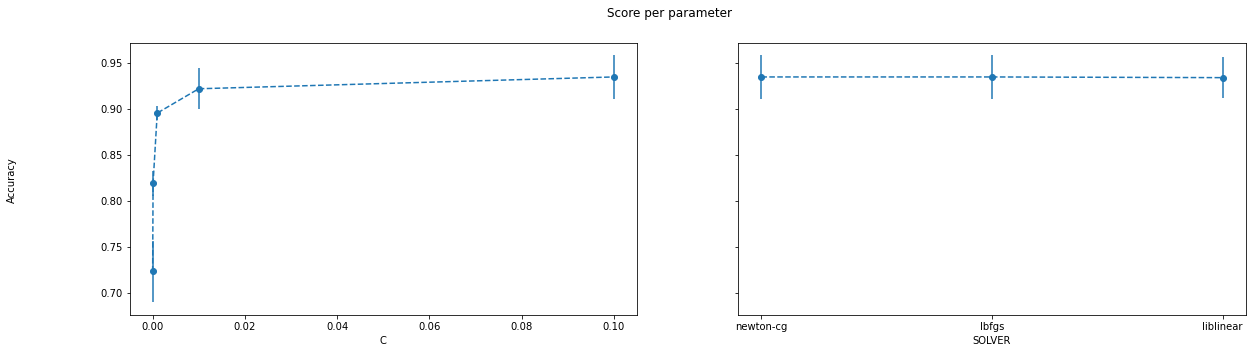

In [119]:
plot_search_results(pair1_lgrModel_fit)

### Pair 2 Graph for LGR

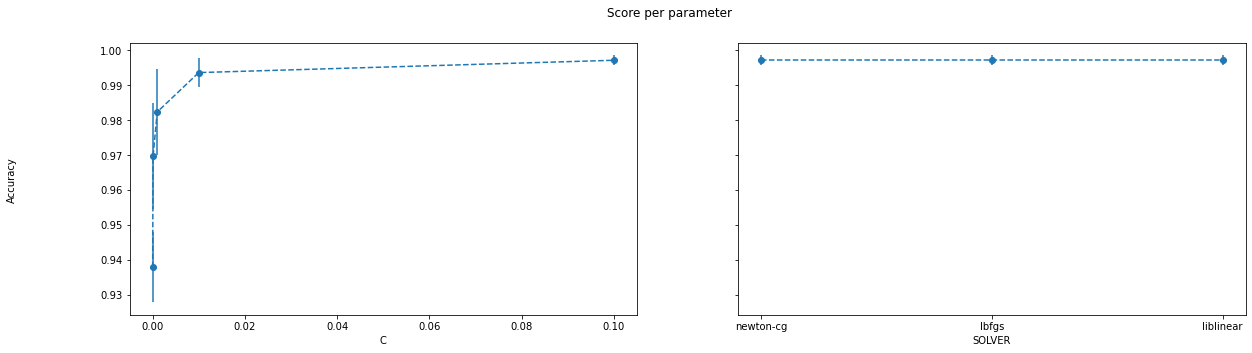

In [120]:
plot_search_results(pair2_lgrModel_fit)

### Pair 3 Graph for LGR

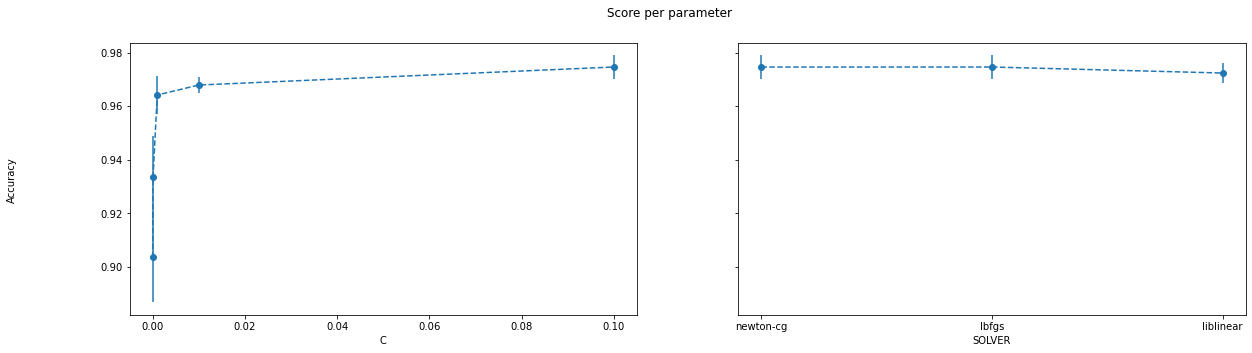

In [121]:
plot_search_results(pair3_lgrModel_fit)

# Dimension Reduction

### Using PCA to get top 4 features

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

X_pair1_pca = pca.fit_transform(X_pair1)
X_pair2_pca = pca.fit_transform(X_pair2)
X_pair3_pca = pca.fit_transform(X_pair3)

### ANN with Dimension Reduction

In [123]:
activationFunction = ['identity', 'logistic', 'tanh', 'relu']
learningRates = [0.1, 0.01, 0.001, 0.002, 0.0001]

tuneHyperParameter = dict(activation = activationFunction, learning_rate_init = learningRates)

annModel = MLPClassifier()

pair1_annModel = GridSearchCV(annModel, tuneHyperParameter, cv=5)
pair2_annModel = GridSearchCV(annModel, tuneHyperParameter, cv=5)
pair3_annModel = GridSearchCV(annModel, tuneHyperParameter, cv=5)

pair1_annModel_fit = pair1_annModel.fit(X_pair1_pca,y_pair1)

pair2_annModel_fit = pair2_annModel.fit(X_pair2_pca,y_pair2)

pair3_annModel_fit = pair3_annModel.fit(X_pair3_pca,y_pair3)

print('Result for pair 1:', pair1_annModel_fit.best_params_)
print("Score for pair 1: ", pair1_annModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 1: ", pair1_annModel.score(X_pair1_pca,y_pair1))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 2:', pair2_annModel_fit.best_params_)
print("Score for pair 2: ", pair2_annModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 2: ", pair2_annModel.score(X_pair2_pca,y_pair2))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 3:', pair3_annModel_fit.best_params_)
print("Score for pair 3: ", pair3_annModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 3: ", pair3_annModel.score(X_pair3_pca,y_pair3))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)

Result for pair 1: {'activation': 'relu', 'learning_rate_init': 0.01}
Score for pair 1:  0.9042568891963565
Score on testing data for pair 1:  0.9151391717583164
Total time is:  0.006993532180786133

Result for pair 2: {'activation': 'tanh', 'learning_rate_init': 0.001}
Score for pair 2:  0.9841551135222023
Score on testing data for pair 2:  0.9828897338403042
Total time is:  0.0070056915283203125

Result for pair 3: {'activation': 'tanh', 'learning_rate_init': 0.002}
Score for pair 3:  0.9717917429326824
Score on testing data for pair 3:  0.9825386165211552
Total time is:  0.0069811344146728516


### Graphs of the dimension reduction results for ANN

### Pair 1 Graph for ANN with dimension reduction

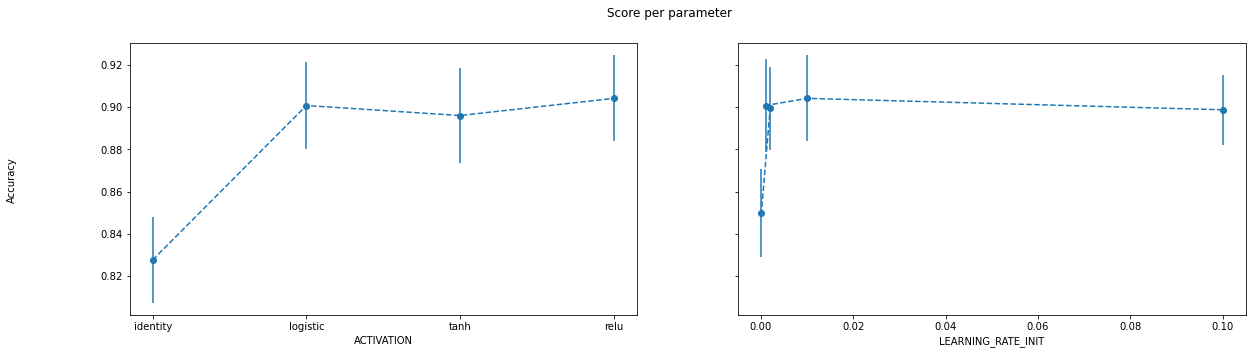

In [124]:
plot_search_results(pair1_annModel_fit)

### Pair 2 Graph for ANN with dimension reduction

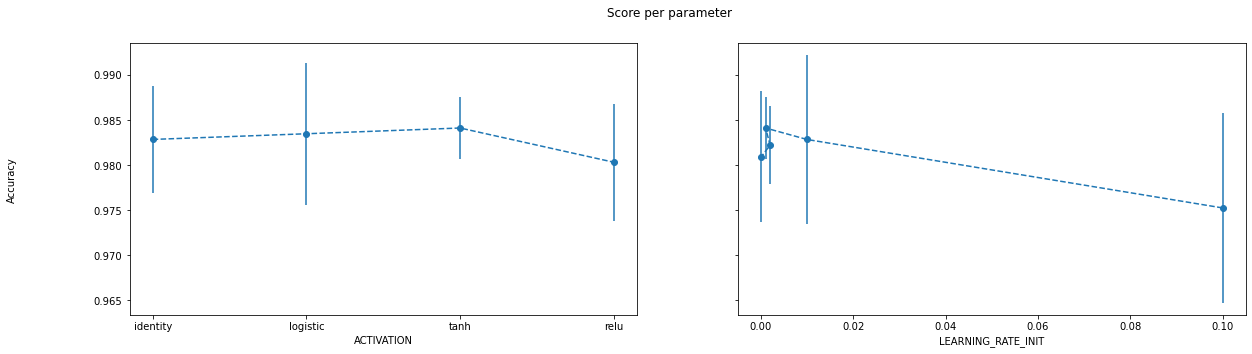

In [125]:
plot_search_results(pair2_annModel_fit)

### Pair 3 Graph for ANN with dimension reduction

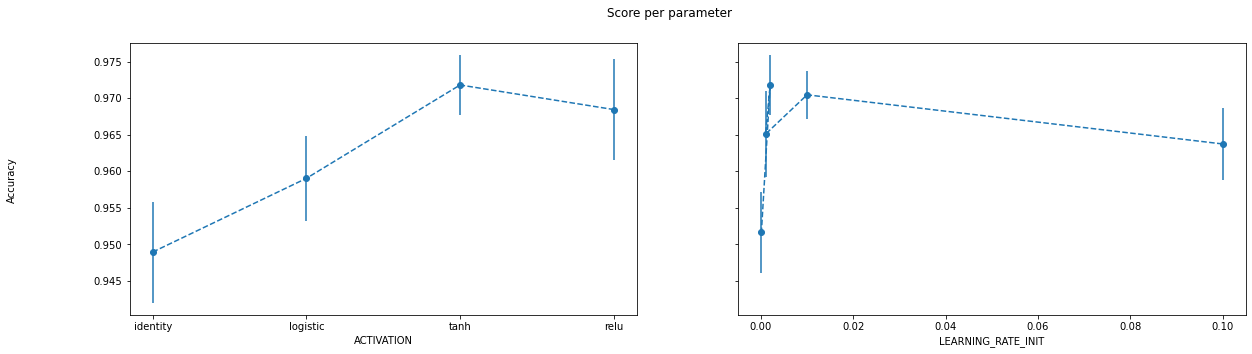

In [126]:
plot_search_results(pair3_annModel_fit)

### Keeping the top 4 features with the highest variance

In [127]:
X_pair1.var()

2       3.613476
8      11.027669
3       4.873223
5       4.806646
1       4.782552
8.1     3.266657
13      1.087691
0      14.070631
6       4.985373
6.1     2.550577
10      3.524368
8.2     2.549378
0.1     2.103779
8.3     1.019878
0.2     4.846692
8.4     2.557472
dtype: float64

In [128]:
X_pair2.var()

2       4.436262
8      10.686001
3       5.020627
5       6.261547
1       7.914500
8.1     3.991327
13      4.838568
0      10.111141
6       4.471138
6.1     3.918184
10      7.332448
8.2     2.046826
0.1    12.244502
8.3     6.999035
0.2     5.445010
8.4     2.782600
dtype: float64

In [129]:
X_pair3.var()

2       3.819847
8      10.736736
3       5.325871
5       5.996303
1       3.395896
8.1     1.291764
13      1.265786
0       3.159056
6       8.271844
6.1     6.714982
10      1.042728
8.2     1.206275
0.1     1.403516
8.3     0.424598
0.2    10.139538
8.4     1.300827
dtype: float64

In [130]:
X_pair1_selected = X_pair1[['8','0','0.2','6']]
X_pair2_selected = X_pair2[['8','0.1','0','1']]
X_pair3_selected = X_pair3[['8','0.2','13','5']]

### KNN with Dimension Reduction

In [131]:
hyperParameter = [1, 2, 3, 4, 5, 6, 7]
nNeighbors = [1, 3, 5, 7, 9]

tuneHyperParameter = dict(p = hyperParameter, n_neighbors = nNeighbors)

knnModel = KNeighborsClassifier()

pair1_knnModel = GridSearchCV(knnModel, tuneHyperParameter, cv=5)
pair2_knnModel = GridSearchCV(knnModel, tuneHyperParameter, cv=5)
pair3_knnModel = GridSearchCV(knnModel, tuneHyperParameter, cv=5)

pair1_knnModel_fit = pair1_knnModel.fit(X_pair1_selected, y_pair1)

pair2_knnModel_fit = pair2_knnModel.fit(X_pair2_selected, y_pair2)

pair3_knnModel_fit = pair3_knnModel.fit(X_pair3_selected, y_pair3)

print("Result for pair 1: ", pair1_knnModel_fit.best_params_)
print("Best score for pair 1: ", pair1_knnModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 1: ", pair1_knnModel_fit.score(X_pair1_selected, y_pair1))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print("Result for pair 2: ", pair2_knnModel_fit.best_params_)
print("Best score for pair 2: ", pair2_knnModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 2: ", pair2_knnModel_fit.score(X_pair2_selected, y_pair2))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 3: ', pair3_knnModel_fit.best_params_)
print("Best score for pair 3: ", pair3_knnModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 3: ", pair3_knnModel_fit.score(X_pair3_selected, y_pair3))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)

Result for pair 1:  {'n_neighbors': 7, 'p': 1}
Best score for pair 1:  0.9171659172143434
Score on testing data for pair 1:  0.9341479972844535
Total time is:  0.03993344306945801

Result for pair 2:  {'n_neighbors': 1, 'p': 1}
Best score for pair 2:  0.9873277074542898
Score on testing data for pair 2:  0.9987325728770595
Total time is:  0.03993415832519531

Result for pair 3:  {'n_neighbors': 3, 'p': 2}
Best score for pair 3:  0.9704426818520778
Score on testing data for pair 3:  0.9832102081934184
Total time is:  0.039896249771118164


### Graphs of the dimension reduction results for KNN

### Pair 1 Graph for KNN with dimension reduction

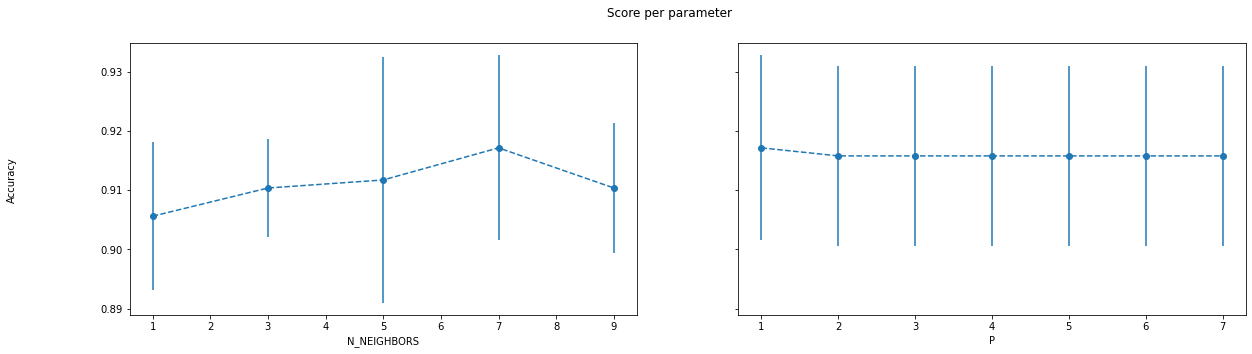

In [132]:
plot_search_results(pair1_knnModel_fit)

### Pair 2 Graph for KNN with dimension reduction

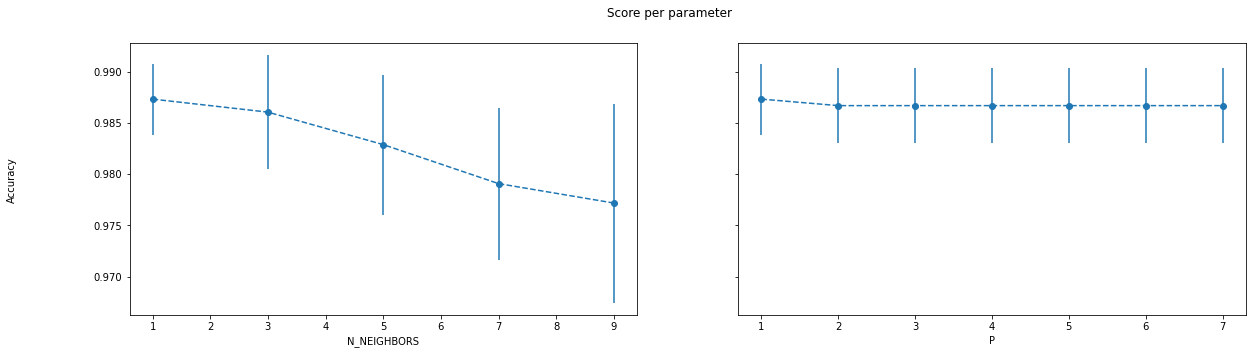

In [133]:
plot_search_results(pair2_knnModel_fit)

### Pair 3 Graph for KNN with dimension reduction

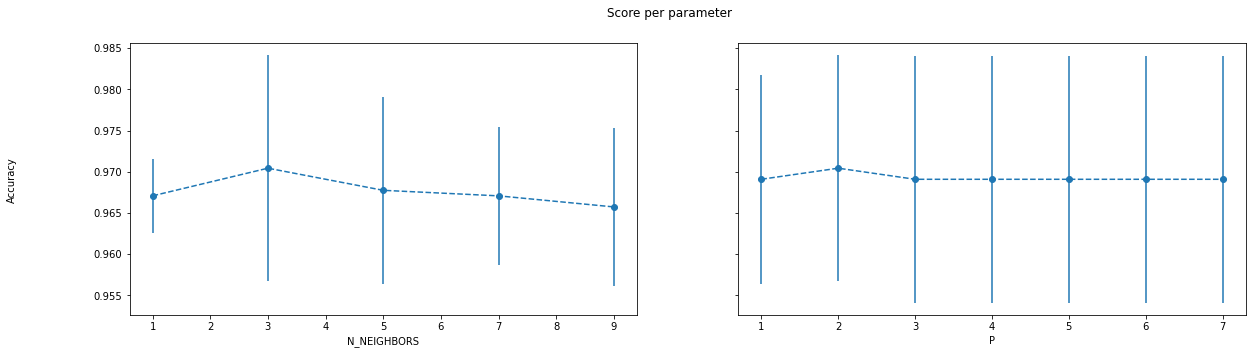

In [134]:
plot_search_results(pair3_knnModel_fit)

### Decision Tree with Dimension Reduction

In [135]:
maxDepth = [2,4,6,8,10]
features = ['auto', 'sqrt', 'log2']

tuneHyperParameter = dict(max_depth=maxDepth, max_features=features)

dTreeModel = DecisionTreeClassifier()

pair1_dTreeModel = GridSearchCV(dTreeModel, tuneHyperParameter, cv=5)
pair2_dTreeModel = GridSearchCV(dTreeModel, tuneHyperParameter, cv=5)
pair3_dTreeModel = GridSearchCV(dTreeModel, tuneHyperParameter, cv=5)

pair1_dTreeModel_fit = pair1_dTreeModel.fit(X_pair1_selected, y_pair1)

pair2_dTreeModel_fit = pair2_dTreeModel.fit(X_pair2_selected, y_pair2)

pair3_dTreeModel_fit = pair3_dTreeModel.fit(X_pair3_selected, y_pair3)

print("Result for pair 1: ", pair1_dTreeModel_fit.best_params_)
print("Score for pair 1: ", pair1_dTreeModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 1: ", pair1_dTreeModel_fit.score(X_pair1_selected, y_pair1))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 2: ', pair2_dTreeModel_fit.best_params_)
print("Score for pair 2: ", pair2_dTreeModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 2: ", pair2_dTreeModel_fit.score(X_pair2_selected, y_pair2))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 3: ', pair3_dTreeModel_fit.best_params_)
print("Score for pair 3: ", pair3_dTreeModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 3: ", pair3_dTreeModel_fit.score(X_pair3_selected, y_pair3))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)

Result for pair 1:  {'max_depth': 10, 'max_features': 'sqrt'}
Score for pair 1:  0.9029147930358585
Score on testing data for pair 1:  0.9416157501697217
Total time is:  0.003989458084106445

Result for pair 2:  {'max_depth': 10, 'max_features': 'log2'}
Score for pair 2:  0.9765541490857947
Score on testing data for pair 2:  0.9885931558935361
Total time is:  0.00497126579284668

Result for pair 3:  {'max_depth': 8, 'max_features': 'auto'}
Score for pair 3:  0.9691026597066866
Score on testing data for pair 3:  0.9684351914036265
Total time is:  0.004022121429443359


### Graphs of the dimension reduction results for Decision Tree

### Pair 1 Graph for Decision Tree with dimension reduction

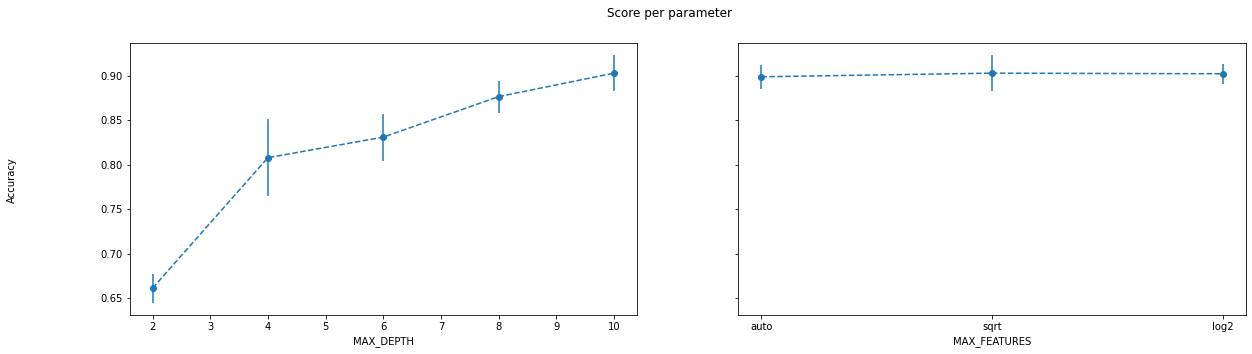

In [136]:
plot_search_results(pair1_dTreeModel_fit)

### Pair 2 Graph for Decision Tree with dimension reduction

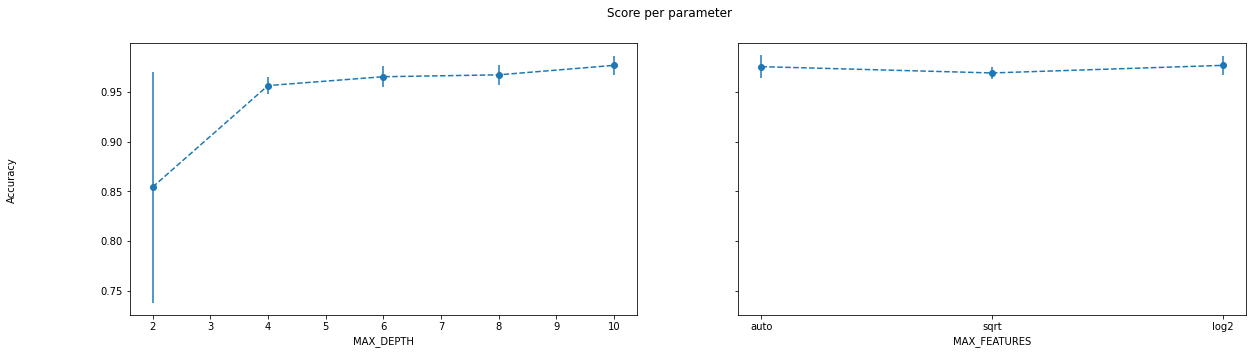

In [137]:
plot_search_results(pair2_dTreeModel_fit)

### Pair 3 Graph for Decision Tree with dimension reduction

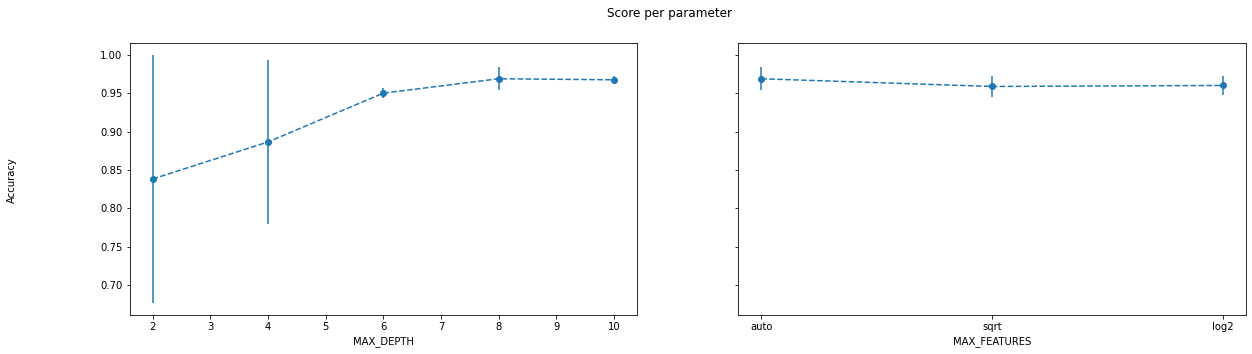

In [138]:
plot_search_results(pair3_dTreeModel_fit)

### SVM with Dimension Reduction

In [139]:
kernel = ['rbf']
cvalue = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

tuneHyperParameter = dict(kernel=kernel, C=cvalue, gamma=gamma)

svmModel = SVC()

pair1_svmModel = GridSearchCV(svmModel, tuneHyperParameter, cv=5)
pair2_svmModel = GridSearchCV(svmModel, tuneHyperParameter, cv=5)
pair3_svmModel = GridSearchCV(svmModel, tuneHyperParameter, cv=5)

pair1_svmModel_fit = pair1_svmModel.fit(X_pair1_selected,y_pair1)

pair2_svmModel_fit = pair2_svmModel.fit(X_pair2_selected,y_pair2)

pair3_svmModel_fit = pair3_svmModel.fit(X_pair3_selected,y_pair3)

print('Result for pair 1:', pair1_svmModel_fit.best_params_)
print("Score for pair 1: ", pair1_svmModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 1: ", pair1_svmModel_fit.score(X_pair1_selected,y_pair1))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 2:', pair2_svmModel_fit.best_params_)
print("Score for pair 2: ", pair2_svmModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 2: ", pair2_svmModel_fit.score(X_pair2_selected,y_pair2))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 3:', pair3_svmModel_fit.best_params_)
print("Score for pair 3: ", pair3_svmModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 3: ", pair3_svmModel_fit.score(X_pair3_selected,y_pair3))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)

Result for pair 1: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Score for pair 1:  0.9178623313732273
Score on testing data for pair 1:  0.9660556687033266
Total time is:  0.021931171417236328

Result for pair 2: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Score for pair 2:  0.9841551135222023
Score on testing data for pair 2:  0.9930291508238276
Total time is:  0.00796651840209961

Result for pair 3: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Score for pair 3:  0.977836530856665
Score on testing data for pair 3:  0.9852249832102082
Total time is:  0.00797891616821289


### Graphs of the dimension reduction results for SVM

### Pair 1 Graph for SVM with dimension reduction

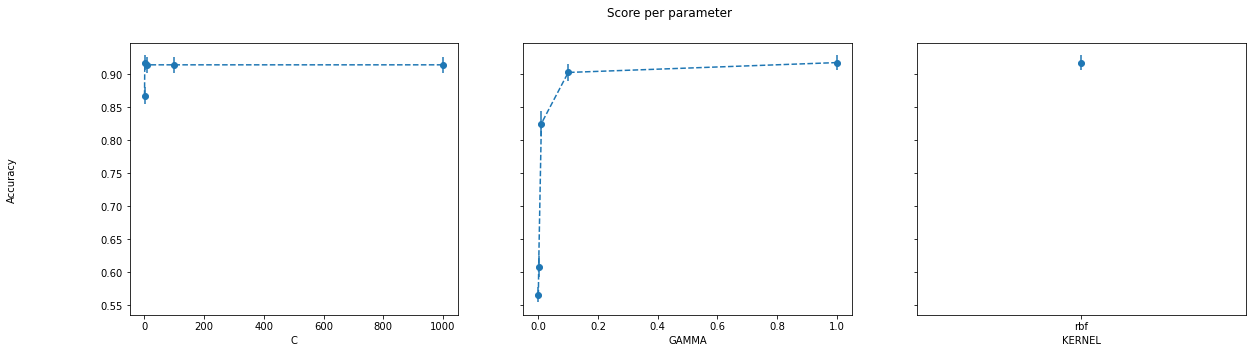

In [140]:
plot_search_results(pair1_svmModel_fit)

### Pair 2 Graph for SVM with dimension reduction

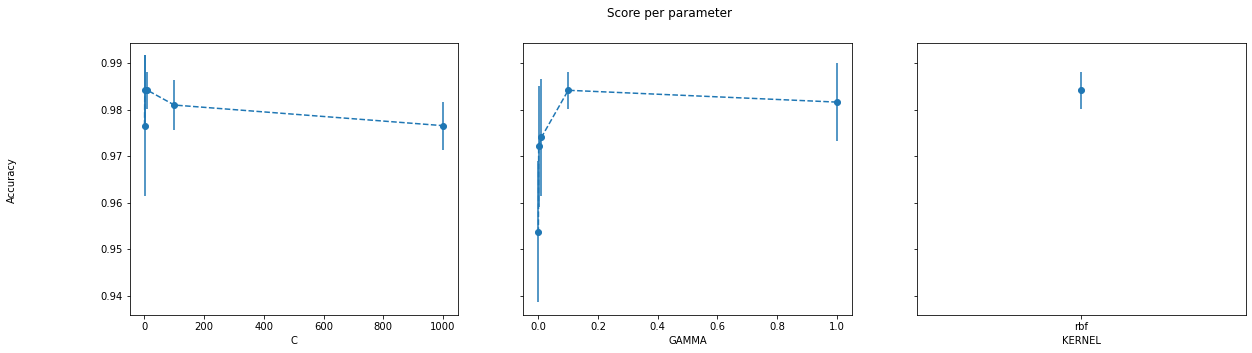

In [141]:
plot_search_results(pair2_svmModel_fit)

### Pair 3 Graph for SVM with dimension reduction

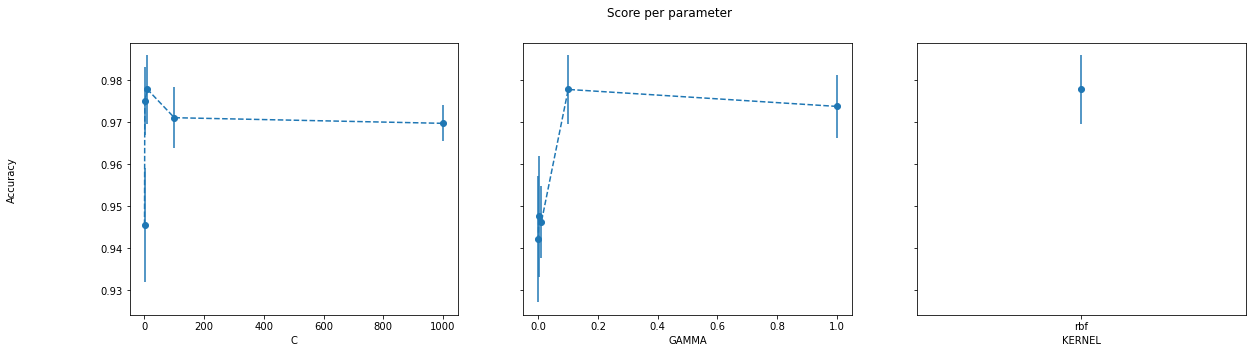

In [142]:
plot_search_results(pair3_svmModel_fit)

### Using Permutation Importance

Text(0.5, 1.0, 'Permutation Importance')

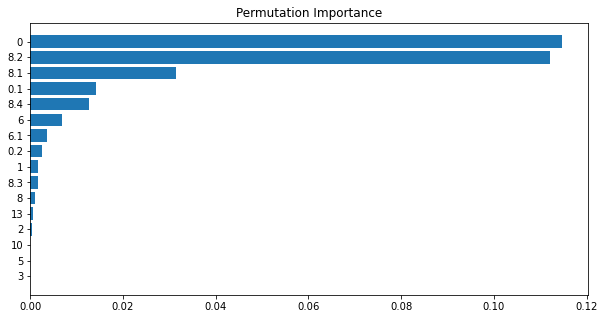

In [143]:
from sklearn.inspection import permutation_importance

randForest = RandomForestClassifier().fit(X_pair1, y_pair1)
result = permutation_importance(randForest, X_pair1, y_pair1)

sorted_idx = result.importances_mean.argsort()
fig = plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_pair1.columns)[sorted_idx])
plt.title('Permutation Importance')

Text(0.5, 1.0, 'Permutation Importance')

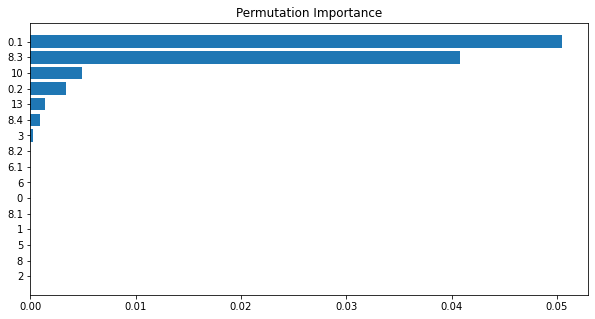

In [144]:
randForest = RandomForestClassifier().fit(X_pair2, y_pair2)
result = permutation_importance(randForest, X_pair2, y_pair2)

sorted_idx = result.importances_mean.argsort()
fig = plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_pair1.columns)[sorted_idx])
plt.title('Permutation Importance')

Text(0.5, 1.0, 'Permutation Importance')

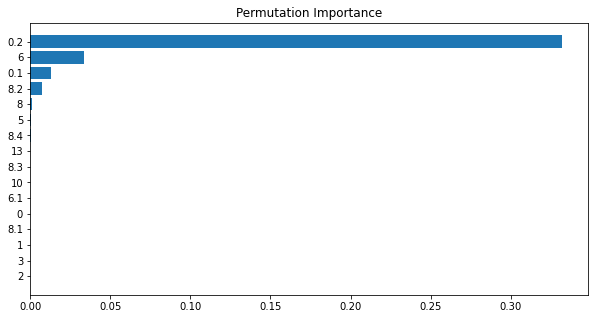

In [145]:
randForest = RandomForestClassifier().fit(X_pair3, y_pair3)
result = permutation_importance(randForest, X_pair3, y_pair3)

sorted_idx = result.importances_mean.argsort()
fig = plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_pair1.columns)[sorted_idx])
plt.title('Permutation Importance')

In [146]:
X_pair1_selected = X_pair1[['8.1', '0','8.2','8.4']]
X_pair2_selected = X_pair2[['0.1', '8.3','13','8.4']]
X_pair3_selected = X_pair3[['0.2', '8.4','13','6']]

### Random Forest with Dimension Reduction

In [147]:
estimators = [20,40,60,80,100]
maxDepth = [4,6,8,10,12]

tuneHyperParameter = dict(n_estimators=estimators,max_depth=maxDepth)

rForestModel = RandomForestClassifier()

pair1_rForestModel = GridSearchCV(rForestModel, tuneHyperParameter, cv=5)
pair2_rForestModel = GridSearchCV(rForestModel, tuneHyperParameter, cv=5)
pair3_rForestModel = GridSearchCV(rForestModel, tuneHyperParameter, cv=5)

pair1_rForestModel_fit = pair1_rForestModel.fit(X_pair1_selected,y_pair1)

pair2_rForestModel_fit = pair2_rForestModel.fit(X_pair2_selected,y_pair2)

pair3_rForestModel_fit = pair3_rForestModel.fit(X_pair3_selected,y_pair3)

print('Result for pair 1: ', pair1_rForestModel_fit.best_params_)
print("Score for pair 1: ", pair1_rForestModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 1: ", pair1_rForestModel_fit.score(X_pair1_selected,y_pair1))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 2: ', pair2_rForestModel_fit.best_params_)
print("Score for pair 2: ", pair2_rForestModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 2: ", pair2_rForestModel_fit.score(X_pair2_selected,y_pair2))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)
print("")
print('Result for pair 3: ', pair3_rForestModel_fit.best_params_)
print("Score for pair 3: ", pair3_rForestModel_fit.best_score_)
tStart = time.time()
print("Score on testing data for pair 3: ", pair3_rForestModel_fit.score(X_pair3_selected,y_pair3))
tEnd = time.time()
print('Total time is: ', tEnd-tStart)

Result for pair 1:  {'max_depth': 8, 'n_estimators': 20}
Score for pair 1:  0.915826127060994
Score on testing data for pair 1:  0.9355057705363204
Total time is:  0.008018255233764648

Result for pair 2:  {'max_depth': 8, 'n_estimators': 40}
Score for pair 2:  0.9923909985935303
Score on testing data for pair 2:  1.0
Total time is:  0.010969400405883789

Result for pair 3:  {'max_depth': 10, 'n_estimators': 20}
Score for pair 3:  0.9858992610670463
Score on testing data for pair 3:  0.9966420416386836
Total time is:  0.007975578308105469


### Graphs of the dimension reduction results for Random Forest

### Pair 1 Graph for Random Forest with dimension reduction

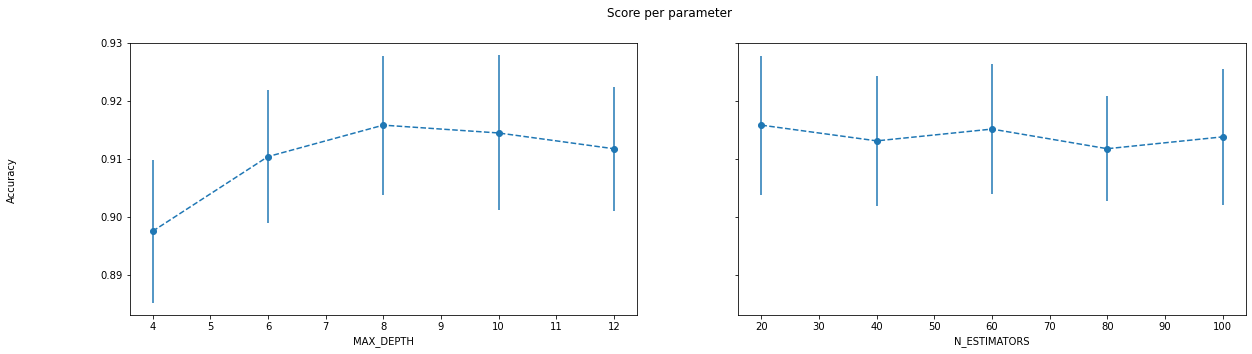

In [148]:
plot_search_results(pair1_rForestModel_fit)

### Pair 2 Graph for Random Forest with dimension reduction

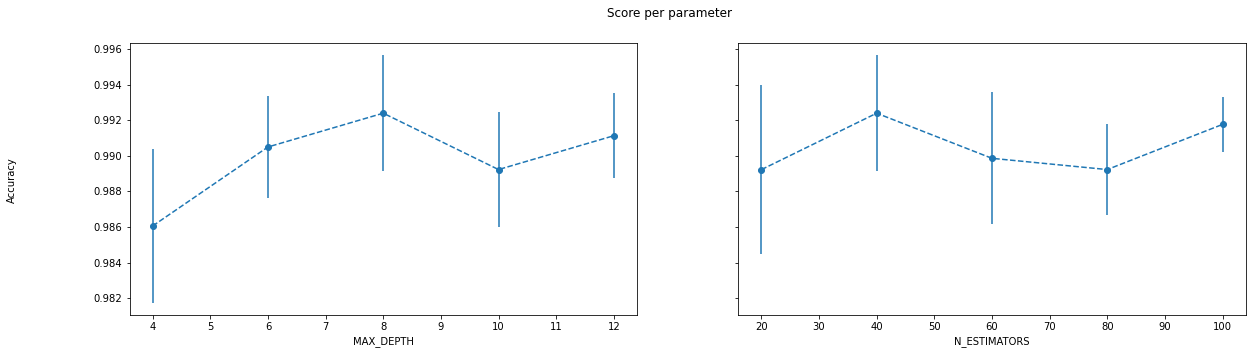

In [149]:
plot_search_results(pair2_rForestModel_fit)

### Pair 3 Graph for Random Forest with dimension reduction

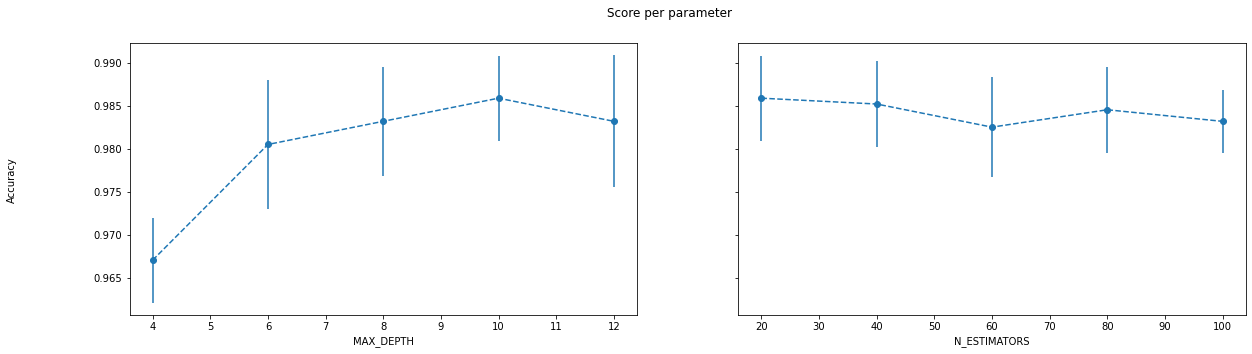

In [150]:
plot_search_results(pair3_rForestModel_fit)